You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 11 marks
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)
1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 4 marks
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

Modeling: 22 marks
1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check.

In [7]:
#read the dataset
election_data=pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [8]:
election_data.shape

(1525, 10)

In [9]:
#Information on the dataframe - Columns, total non-null values, datatype
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [10]:
#going through data to check rendomness and have a cursory glance
election_data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [11]:
#going through data to check rendomness and have a cursory glance
election_data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [12]:
#checking the variation of the values for numeric attributes. Categorical attributes can be ignored. 
election_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [13]:
#Checing for the nulls in the dataset across columns
election_data.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [26]:
#Creating a function to get all the different values and their respective counts present in the different attributes in the dataframe
def get_value_counts(dataframe):
    value_count_dict={}
    for column in dataframe.columns:
        value_count_dict[column]=dataframe[column].value_counts()
    return value_count_dict

In [79]:
#values and their respective count present in the dataframe
print(get_value_counts(election_data))

{'vote': vote
0    1063
1     462
Name: count, dtype: int64, 'age': age
37    42
49    39
35    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: count, Length: 70, dtype: int64, 'economic.cond.national': economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: count, dtype: int64, 'economic.cond.household': economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: count, dtype: int64, 'Blair': Blair
4    836
2    438
5    153
1     97
3      1
Name: count, dtype: int64, 'Hague': Hague
2    624
4    558
1    233
5     73
3     37
Name: count, dtype: int64, 'Eurosceptic': Eurosceptic
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: count, dtype: int64, 'political.knowledge': political.knowledge
2    782
0    455
3    250
1     38
Name: count, dtype: int64, 'gender': gender
1    812
0    713
Name: count, dtype: int64}


1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [42]:
#dropping the attribute: 'unnamed:0' as it has got no use in the analysis. 
election_data.drop(['Unnamed: 0'] ,axis=1, inplace=True)

In [45]:
#to chart box-plot, converting the attributes 'vote' and 'gender' to numeric with the mapping as: 
# Male=0, Female = 1
election_data['gender']=election_data['gender'].replace({'female':1, 'male':0})

In [47]:
# Converting the vote attribute values as following: Labour=0, Conservative=1 ;
election_data['vote']=election_data['vote'].replace({'Labour':0,'Conservative':1})

In [48]:
election_data.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,0
2,0,35,4,4,5,2,3,2,0
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,0
5,0,47,3,4,4,4,4,2,0
6,0,57,2,2,4,4,11,2,0
7,0,77,3,4,4,1,1,0,0
8,0,39,3,3,4,4,11,0,1
9,0,70,3,2,5,1,11,2,0


In [76]:
#The attribute 'Europe' is misleading in its name; replacing it with 'Eurosceptic'
election_data.rename(columns={'Europe':'Eurosceptic'}, inplace=True)

In [73]:
#as part of the univariate analysis of the attributes, creating a function for the countplot
def cnt_plot(dataframe):
    plt.figure(figsize=(20,20))
    attr=dataframe.columns
    for i in range(len(attr)):
        plt.subplot(3,4,i+1)
        sns.countplot(data=dataframe, x=dataframe[attr[i]])
        plt.title('Countplot of {}'.format(attr[i]))
        plt.tight_layout()

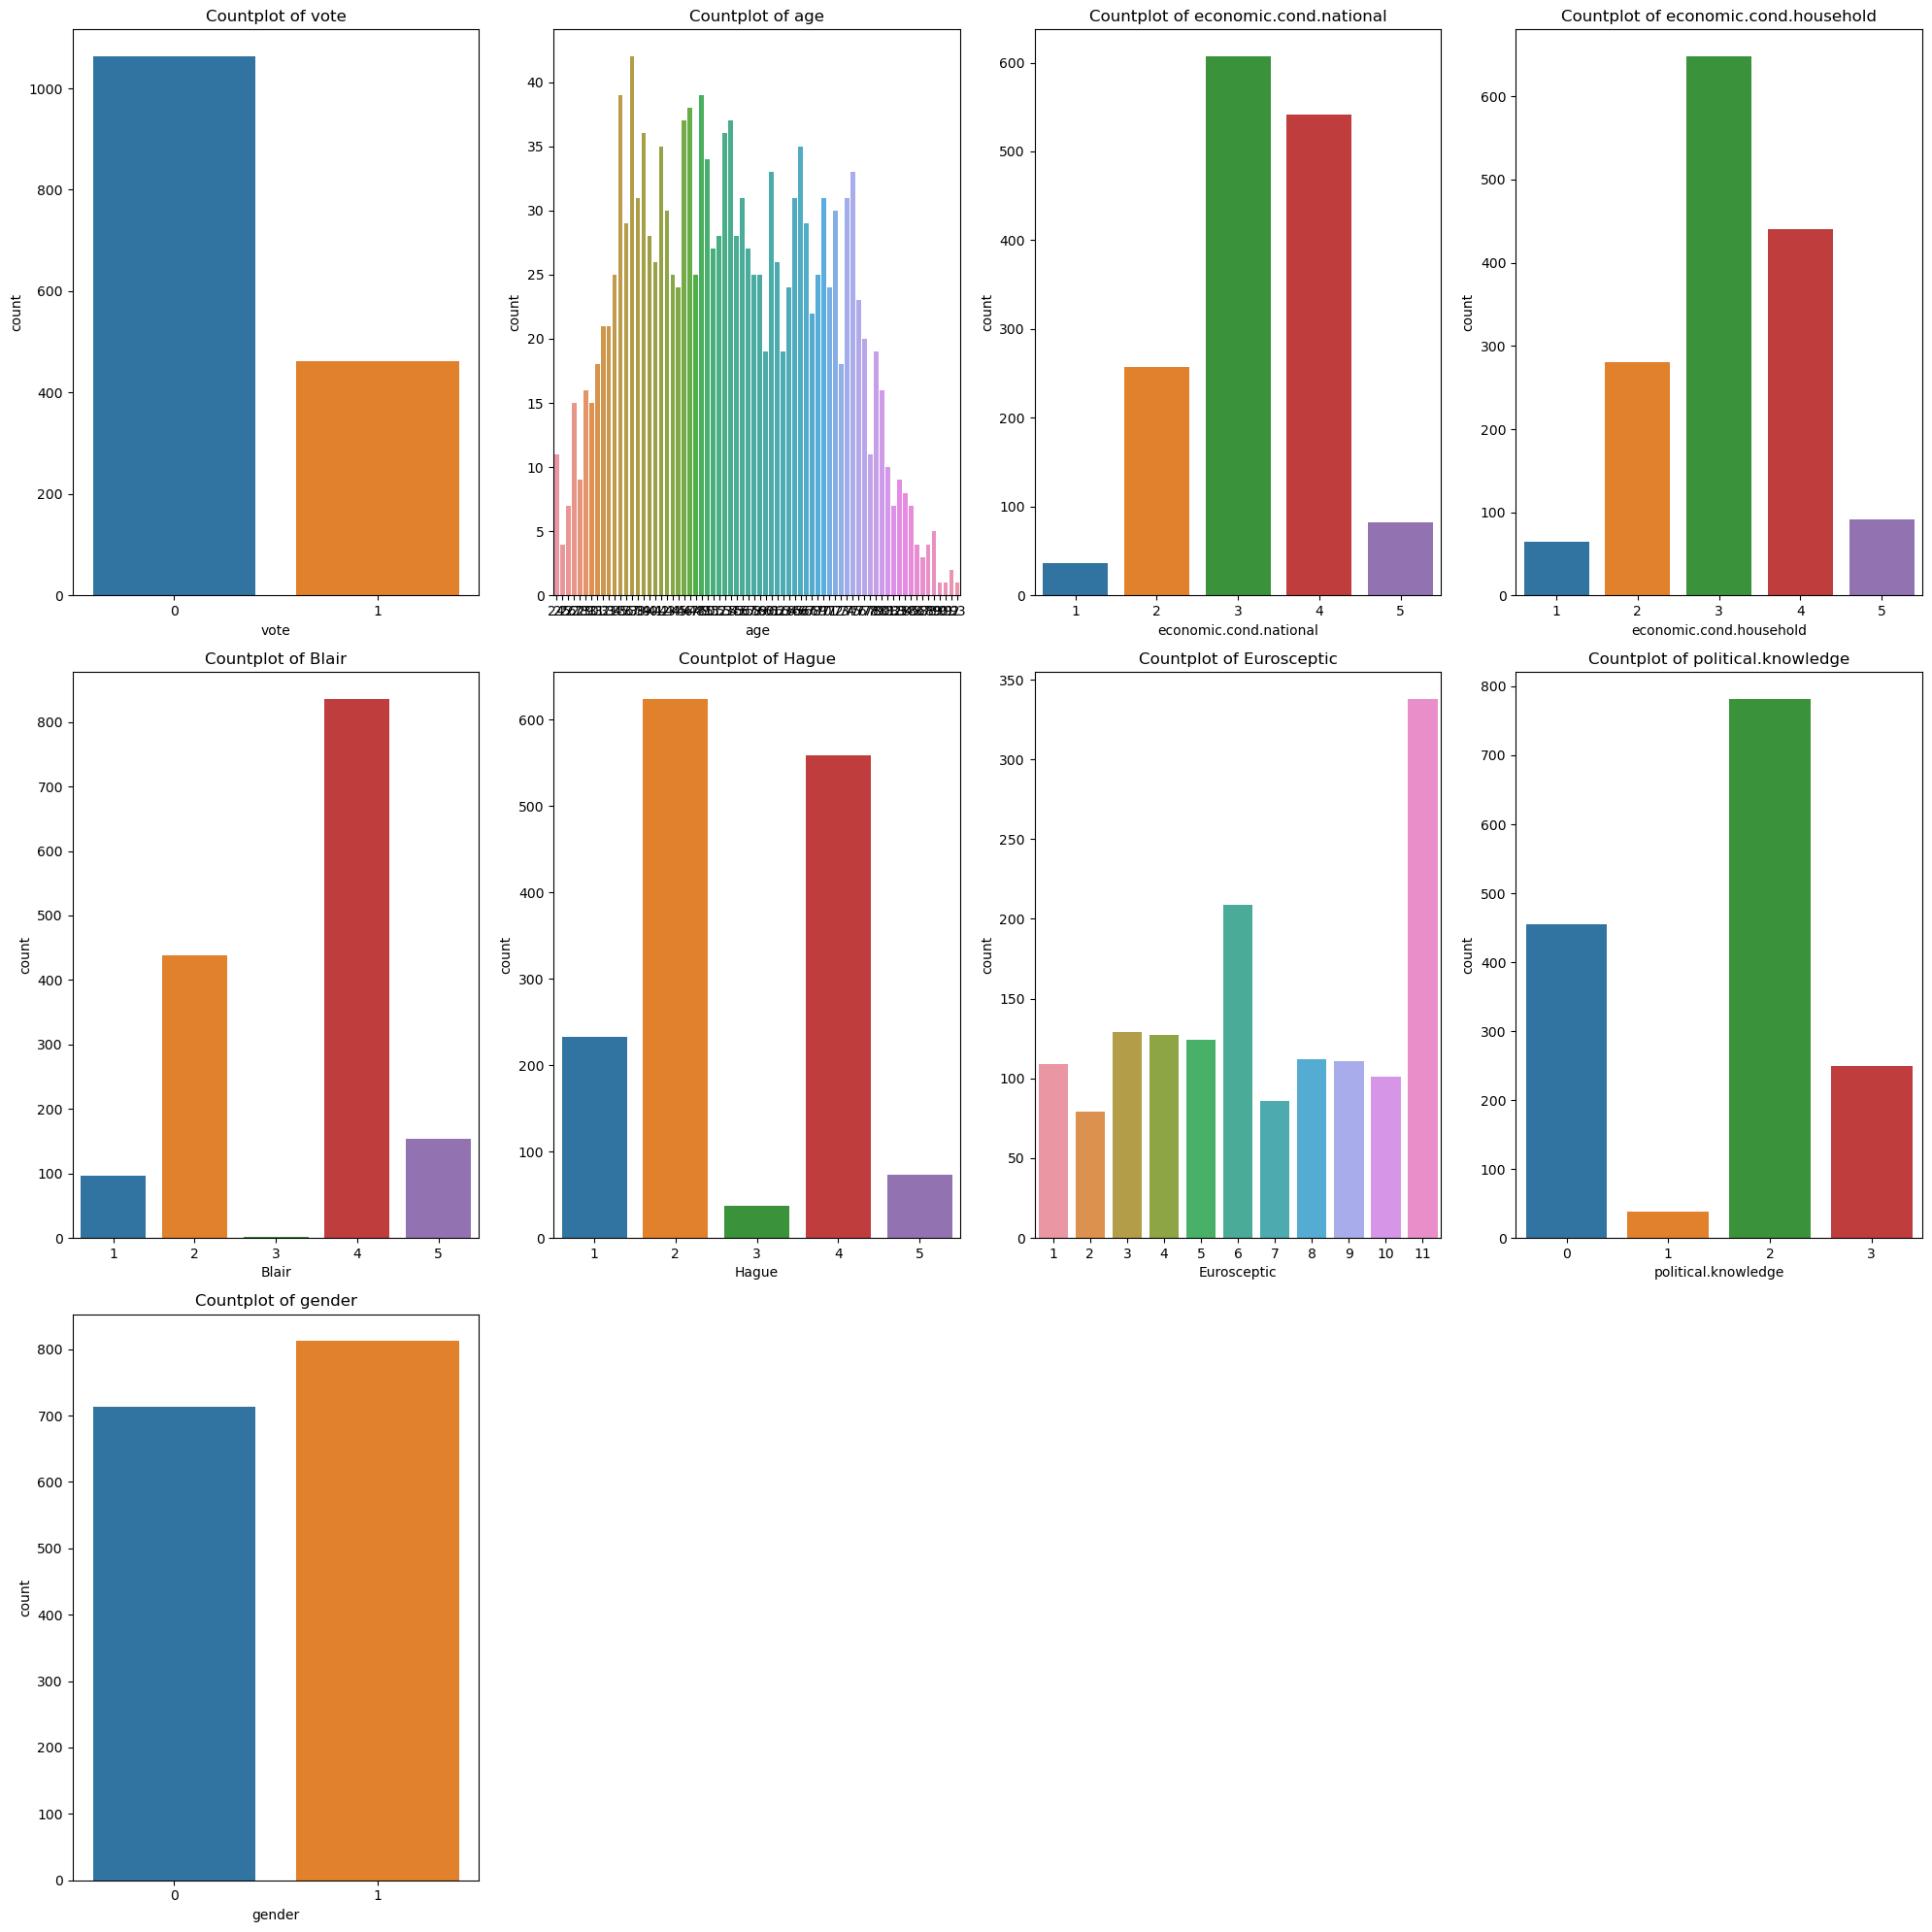

In [78]:
cnt_plot(election_data)

In [52]:
#defining a function to perform univariate analysis(box-plot)
def box_plot(dataframe):
    plt.figure(figsize=(25,20))
    clmn=dataframe.columns
    for i in range(len(clmn)):
        plt.subplot(5,4,i+1)
        sns.boxplot(data=dataframe, y=dataframe[clmn[i]],hue=dataframe[clmn[i]])
        plt.title('Box-plot of {}'.format(clmn[i]))
        plt.tight_layout()
        

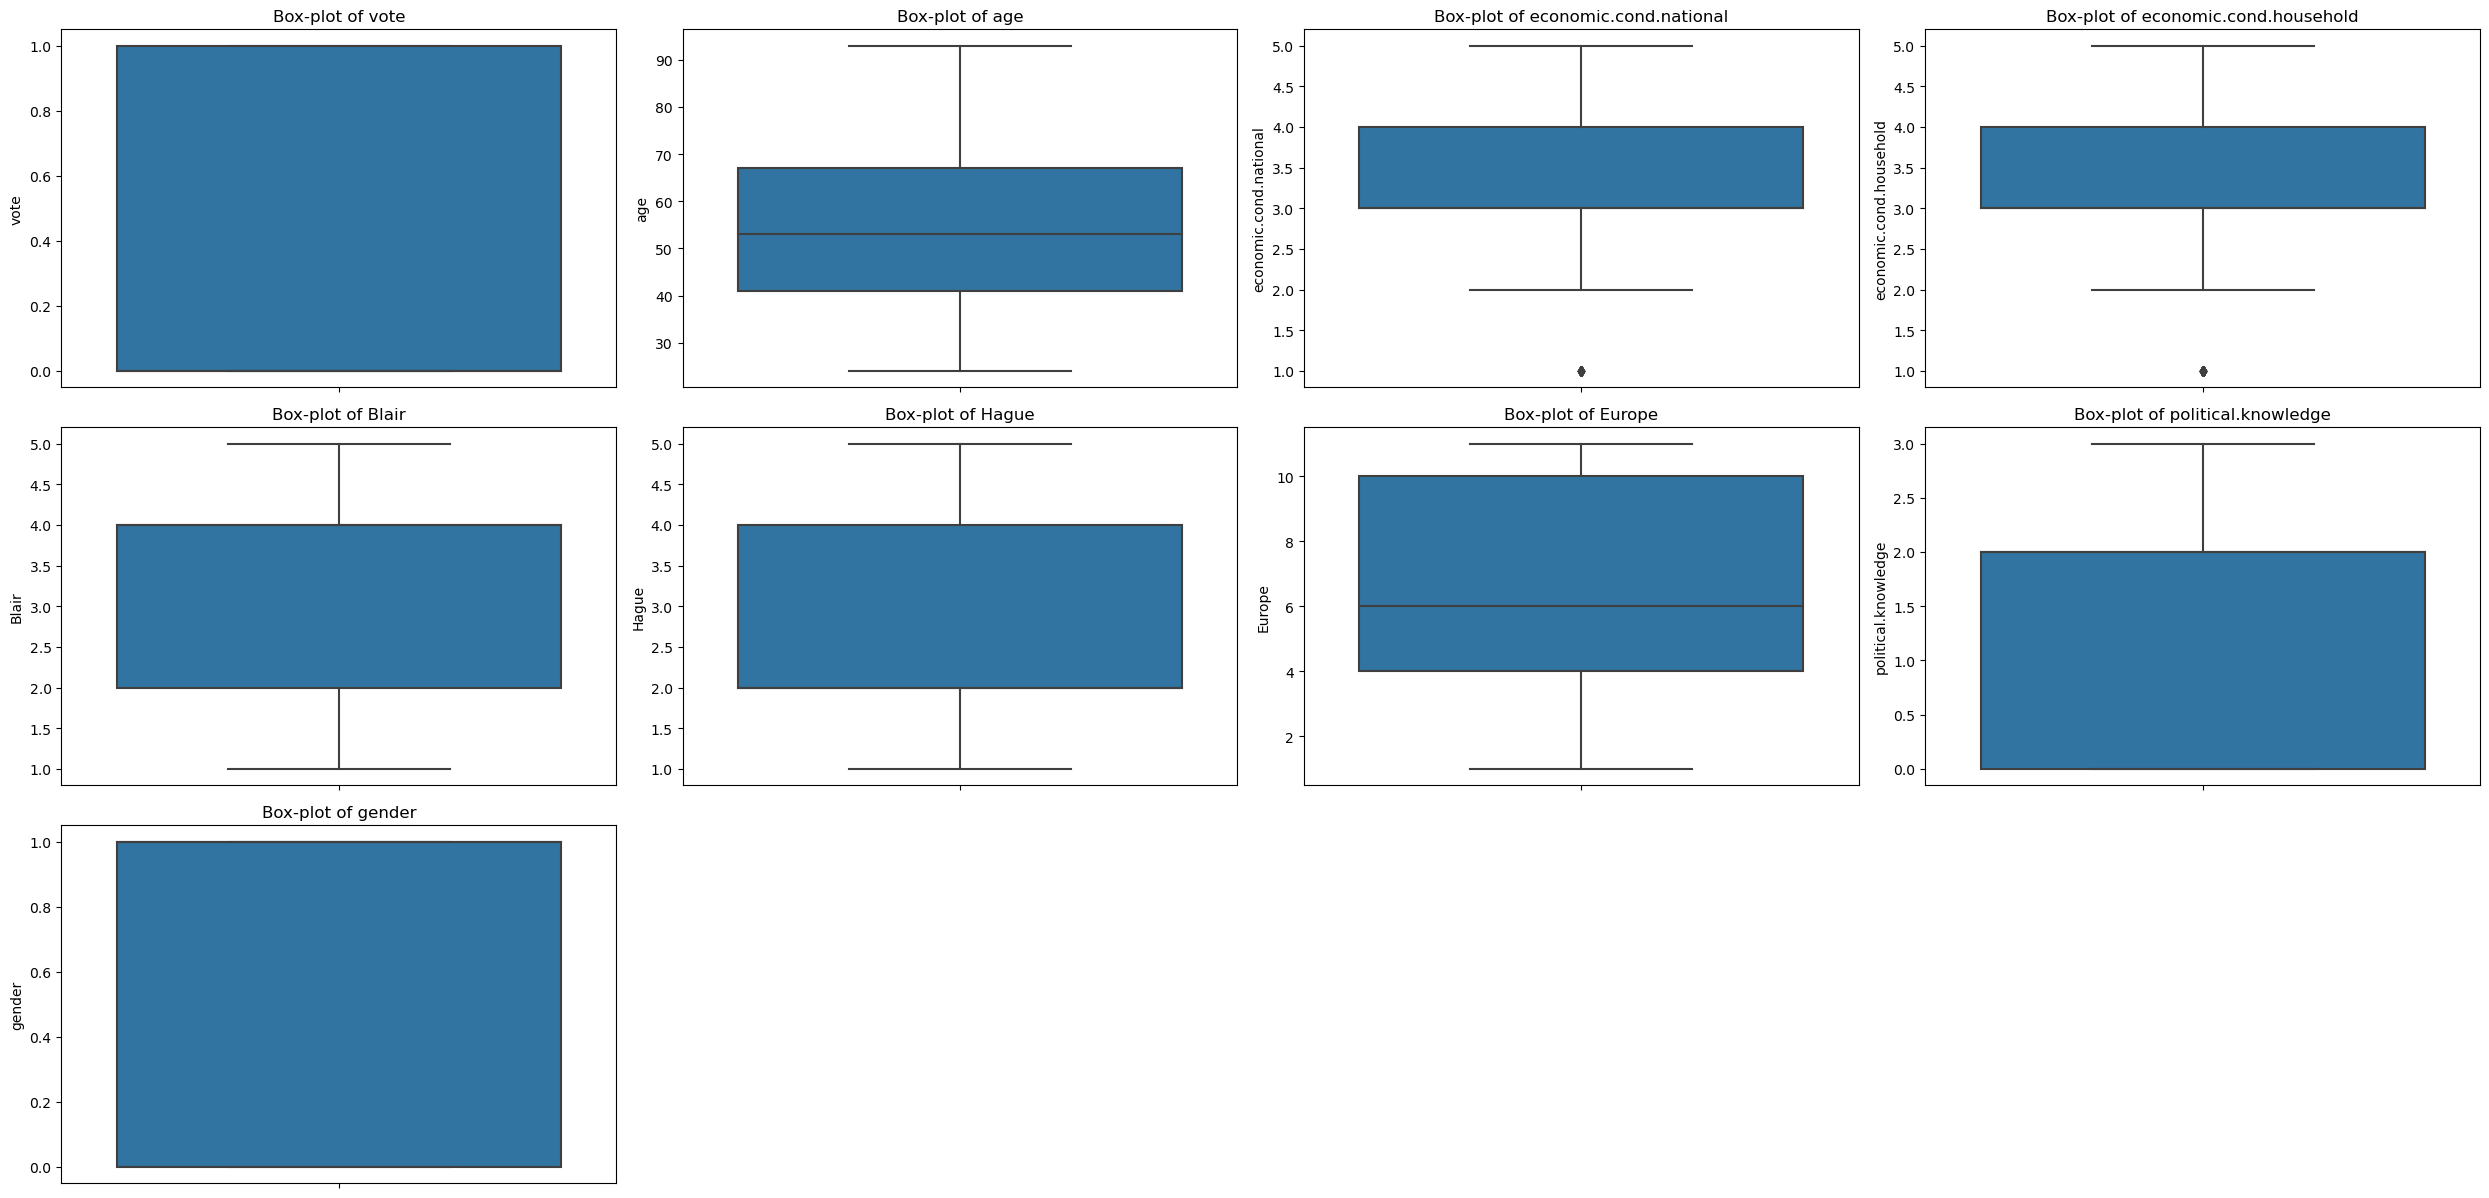

In [51]:
box_plot(election_data)
#x=election_data.columns

<Figure size 2000x2500 with 0 Axes>

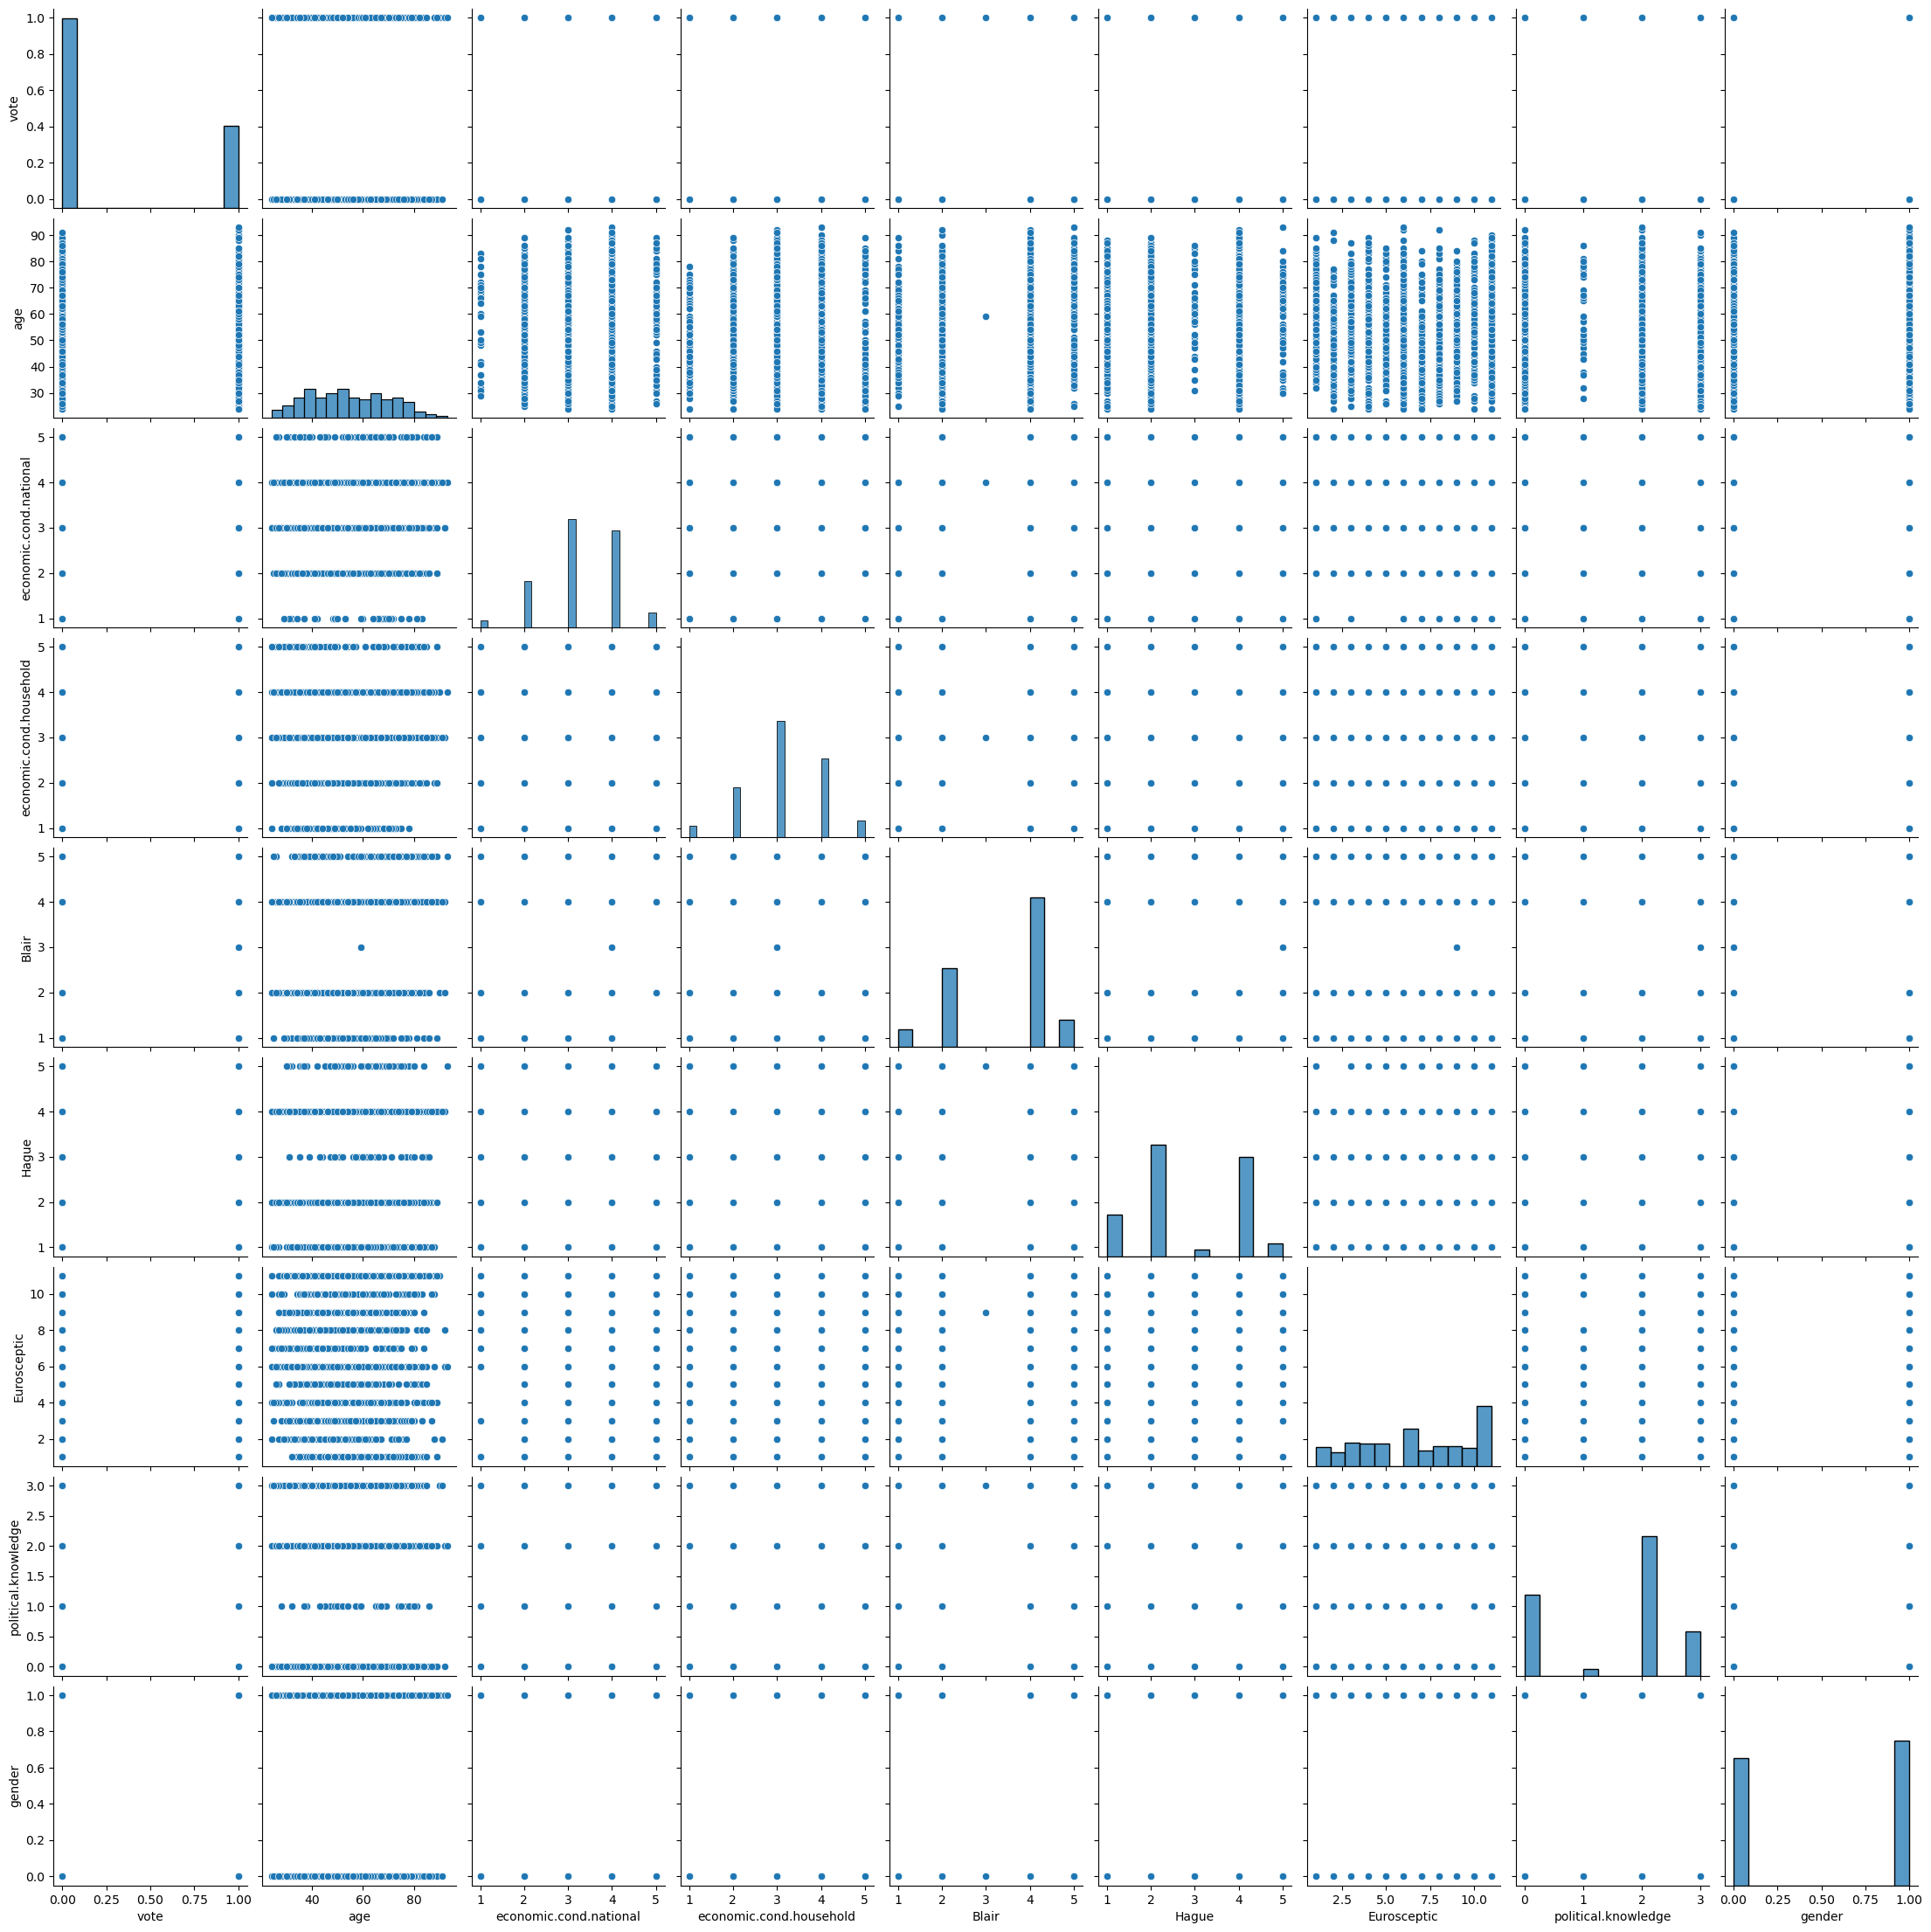

In [80]:
plt.figure(figsize=(20,25))
sns.pairplot(election_data)

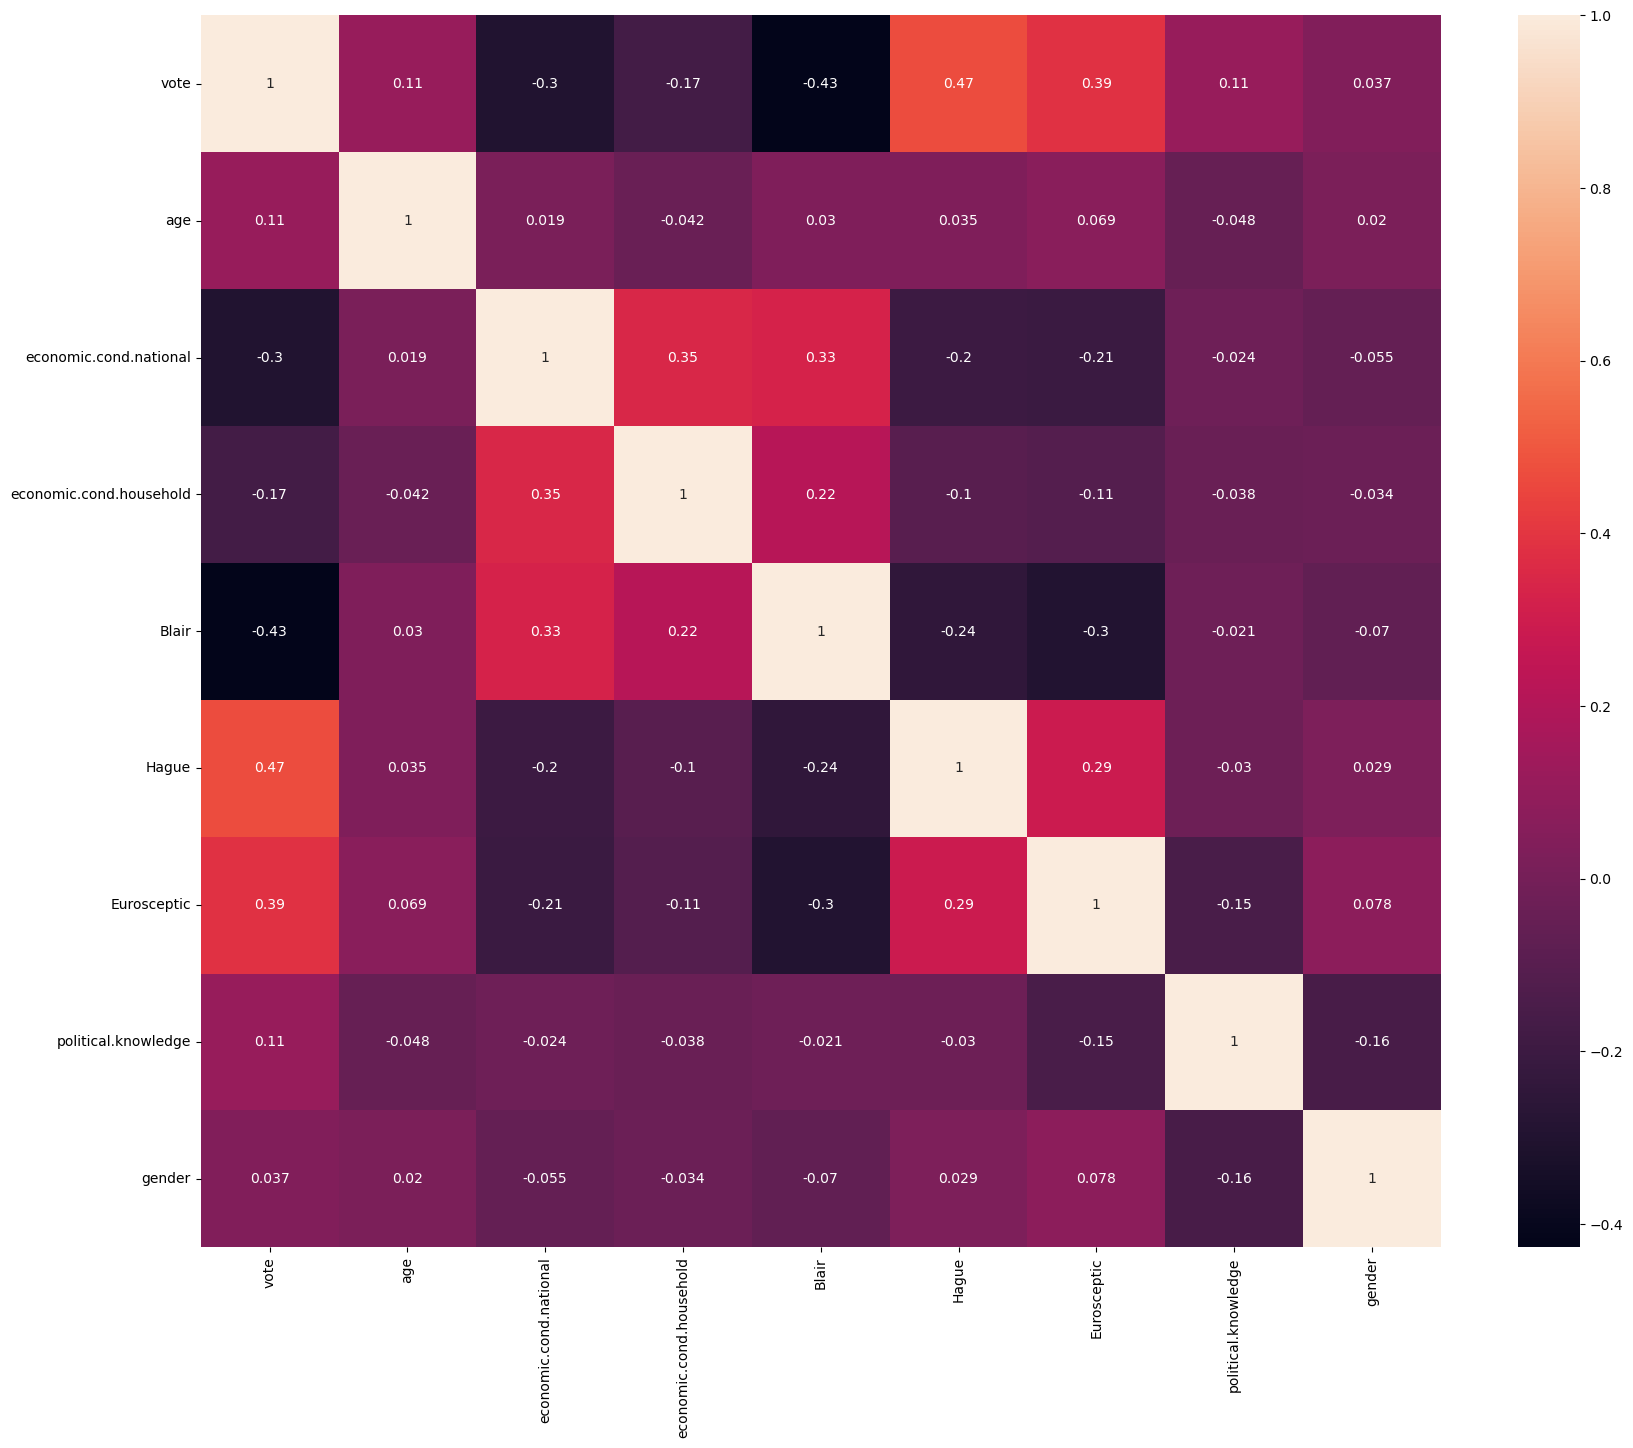

In [84]:
correlation_matrix = election_data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 

The encoding is done above as part of Problem 1.2

In [113]:
#performing scaling on a copy of the election data dataframe
election_data_bkp=election_data
election_data_bkp.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Eurosceptic,political.knowledge,gender
0,0,0.275362,3,3,4,1,2,2,1
1,0,0.173913,4,4,4,4,5,2,0
2,0,0.159420,4,4,5,2,3,2,0
3,0,0.000000,4,2,2,1,4,0,1
4,0,0.246377,2,2,1,1,6,2,0


In [114]:
#scaling the age column
from sklearn.preprocessing import minmax_scale
scalar = minmax_scale(election_data_bkp['age'], feature_range=(0,1), axis=0, copy=True)
election_data_bkp['age']=scalar

In [115]:
election_data_bkp.head(25)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Eurosceptic,political.knowledge,gender
0,0,0.275362,3,3,4,1,2,2,1
1,0,0.173913,4,4,4,4,5,2,0
2,0,0.159420,4,4,5,2,3,2,0
3,0,0.000000,4,2,2,1,4,0,1
4,0,0.246377,2,2,1,1,6,2,0
5,0,0.333333,3,4,4,4,4,2,0
6,0,0.478261,2,2,4,4,11,2,0
7,0,0.768116,3,4,4,1,1,0,0
8,0,0.217391,3,3,4,4,11,0,1
9,0,0.666667,3,2,5,1,11,2,0


In [122]:
#Now we split the data into test and train data
#independent data
X=election_data_bkp.drop(['vote'], axis=1)
#dependant variable
y=election_data_bkp[['vote']]

In [117]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size = 0.30, random_state=1)

1.4 Apply Logistic Regression and LDA (linear discriminant analysis). 

model_score: 0.8406747891283973
Confusion Matrix:
 [[667  68]
 [102 230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Accuracy Score: 0.8406747891283973
ROC AUC Score: 0.8001270387673141


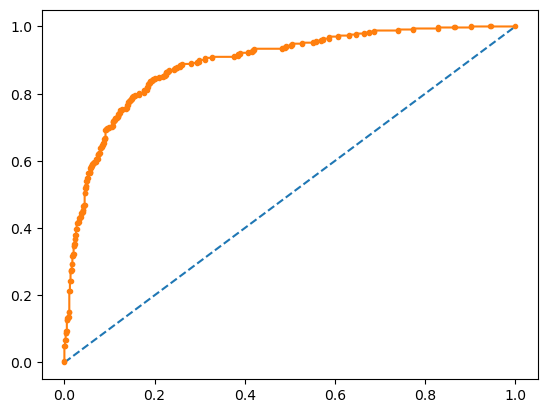

In [186]:
#Applying SKlearnlinearmodel for linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
Logisticmodel=LogisticRegression()
Logisticmodel.fit(X_train, y_train)
#Predicting dependent values on train data set
Logistic_y_predict=Logisticmodel.predict(X_train)
#Confusion matrix
Logisticmodel_confusion_matrix=confusion_matrix(y_train, Logistic_y_predict)
#Classification report
Logisticmodel_classification_report=classification_report(y_train, Logistic_y_predict)
#Accuracy
Logisticmodel_accuracy_score = accuracy_score(y_train, Logistic_y_predict)
#ROC_AUC score
Logisticmodel_roc_auc_score = roc_auc_score(y_train, Logistic_y_predict)
#Calculating probability of 1 for the training data
Logistic_y_predict_probs=Logisticmodel.predict_proba(X_train)
Logistic_y_predict_probs=Logistic_y_predict_probs[:,1]
fpr,tpr, thresholds=roc_curve(y_train, Logistic_y_predict_probs)

#Print various scores and metrics
print('model_score:',Logisticmodel_score)
print('Confusion Matrix:\n',Logisticmodel_confusion_matrix)
print('Classification Report:\n',Logisticmodel_classification_report)
print('Accuracy Score:',Logisticmodel_accuracy_score)
print('ROC AUC Score:',Logisticmodel_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()


Confusion Matrix:
 [[292  36]
 [ 45  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458

Accuracy Score: 0.8231441048034934
ROC AUC Score: 0.7720450281425891


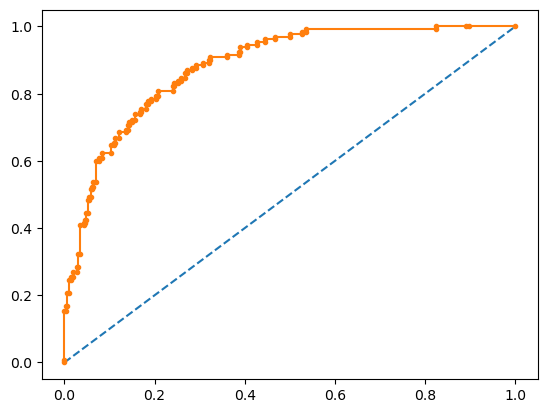

In [191]:
#Evaluating the above model on test data
Logisticmodel=LogisticRegression()
Logisticmodel.fit(X_train, y_train)
#Predicting dependent values on train data set
Logistic_y_test_predict=Logisticmodel.predict(X_test)
#Confusion matrix
Logisticmodel_confusion_matrix=confusion_matrix(y_test, Logistic_y_test_predict)
#Classification report
Logisticmodel_classification_report=classification_report(y_test, Logistic_y_test_predict)
#Accuracy
Logisticmodel_accuracy_score = accuracy_score(y_test, Logistic_y_test_predict)
#ROC_AUC score
Logisticmodel_roc_auc_score = roc_auc_score(y_test, Logistic_y_test_predict)
#Calculating probability of 1 for the training data
Logistic_y_test_predict_probs=Logisticmodel.predict_proba(X_test)
Logistic_y_test_predict_probs=Logistic_y_test_predict_probs[:,1]
fpr_test,tpr_test, thresholds_test=roc_curve(y_test, Logistic_y_test_predict_probs)

#Print various scores and metrics
#print('model_score:',Logisticmodel_score)
print('Confusion Matrix:\n',Logisticmodel_confusion_matrix)
print('Classification Report:\n',Logisticmodel_classification_report)
print('Accuracy Score:',Logisticmodel_accuracy_score)
print('ROC AUC Score:',Logisticmodel_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_test,tpr_test,marker='.')
plt.show()


#LDA

Confusion Matrix:
 [[660  75]
 [ 99 233]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067

Accuracy Score: 0.8369259606373008
ROC AUC Score: 0.799883206294566


C:\Users\av913372\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


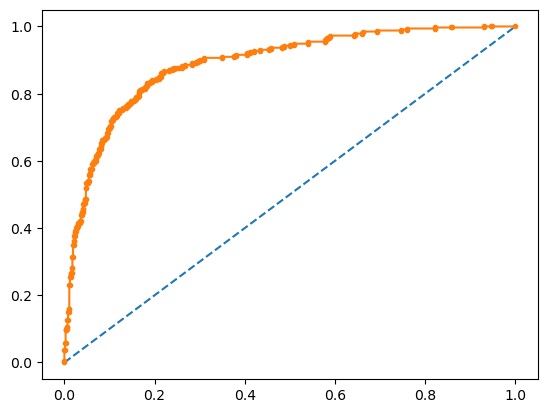

In [174]:
#import LDA package from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Training the model
clf=LDA()
lda=clf.fit(X_train, y_train)
lda_y_pred=lda.predict(X_train)

#Confusion Matrix
lda_confusion_matrix=confusion_matrix(y_train, lda_y_pred)

#Classification report
lda_classification_report=classification_report(y_train, lda_y_pred)

#Accuracy Score
lda_accuracy_score=accuracy_score(y_train, lda_y_pred)

#ROC_AUC score
lda_roc_auc_score = roc_auc_score(y_train, lda_y_pred)

#Calculating probability of 1 for the training data
lda_y_predict_probs=lda.predict_proba(X_train)
lda_y_predict_probs=lda_y_predict_probs[:,1]
fpr_lda,tpr_lda, thresholds_lda=roc_curve(y_train, lda_y_predict_probs)

#Print various scores and metrics
print('Confusion Matrix:\n',lda_confusion_matrix)
print('Classification Report:\n',lda_classification_report)
print('Accuracy Score:',lda_accuracy_score)
print('ROC AUC Score:',lda_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_lda,tpr_lda,marker='.')
plt.show()

Confusion Matrix:
 [[289  39]
 [ 44  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458

Accuracy Score: 0.8187772925764192
ROC AUC Score: 0.7713180112570356


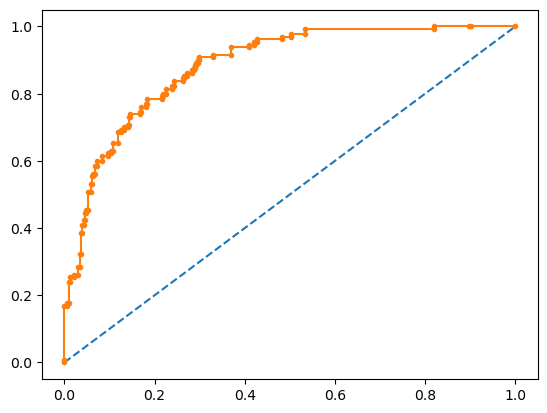

In [192]:
#Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

#testing the model
clf=LDA()
lda=clf.fit(X_train, y_train)
lda_y_test_pred=lda.predict(X_test)

#Confusion Matrix
lda_confusion_matrix=confusion_matrix(y_test, lda_y_test_pred)

#Classification report
lda_classification_report=classification_report(y_test, lda_y_test_pred)

#Accuracy Score
lda_accuracy_score=accuracy_score(y_test, lda_y_test_pred)

#ROC_AUC score
lda_roc_auc_score = roc_auc_score(y_test, lda_y_test_pred)

#Calculating probability of 1 for the testing data
lda_y_test_predict_probs=lda.predict_proba(X_test)
lda_y_test_predict_probs=lda_y_test_predict_probs[:,1]
fpr_test_lda,tpr_test_lda, thresholds_lda=roc_curve(y_test, lda_y_test_predict_probs)

#Print various scores and metrics
print('Confusion Matrix:\n',lda_confusion_matrix)
print('Classification Report:\n',lda_classification_report)
print('Accuracy Score:',lda_accuracy_score)
print('ROC AUC Score:',lda_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_test_lda,tpr_test_lda,marker='.')
plt.show()

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

Naive Bayes

Confusion Matrix:
 [[649  86]
 [ 92 240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.72      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Accuracy Score: 0.8331771321462043
ROC AUC Score: 0.802942381771986


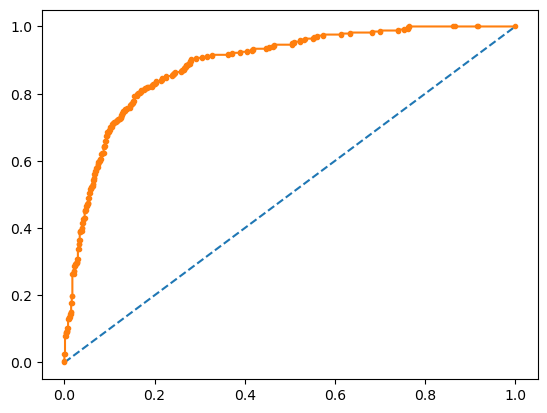

In [183]:
from sklearn.naive_bayes import GaussianNB
#training the model
gnb=GaussianNB().fit(X_train, y_train)
gnb_y_pred=gnb.predict(X_train)

#Confusion Matrix
gnb_confusion=confusion_matrix(y_train, gnb_y_pred)

#Colassification Report
gnb_classifiction_report=classification_report(y_train, gnb_y_pred)

#Accuracy Score
gnb_accuracy=accuracy_score(y_train,gnb_y_pred)

#ROC AUC Score
gnb_roc_auc_score=roc_auc_score(y_train,gnb_y_pred)

#Calculating probability of 1 for the testing data
gnb_y_pred_probs=gnb.predict_proba(X_train)
gnb_y_pred_probs=gnb_y_pred_probs[:,1]
fpr_train_gnb,tpr_train_gnb, thresholds_lda=roc_curve(y_train, gnb_y_pred_probs)

#Print various scores and metrics
print('Confusion Matrix:\n',gnb_confusion)
print('Classification Report:\n',gnb_classifiction_report)
print('Accuracy Score:',gnb_accuracy)
print('ROC AUC Score:',gnb_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_train_gnb,tpr_train_gnb,marker='.')
plt.show()

Confusion Matrix:
 [[292  36]
 [ 39  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       328
           1       0.72      0.70      0.71       130

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458

Accuracy Score: 0.8362445414847162
ROC AUC Score: 0.7951219512195122


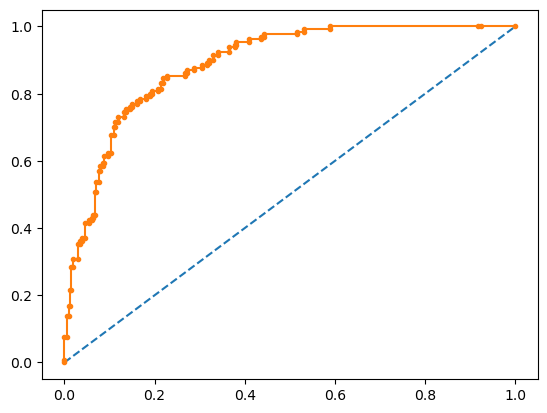

In [184]:
#testing the model
gnb=GaussianNB().fit(X_test, y_test)
gnb_y_test_pred=gnb.predict(X_test)

#Confusion Matrix
gnb_confusion=confusion_matrix(y_test, gnb_y_test_pred)

#Colassification Report
gnb_classifiction_report=classification_report(y_test, gnb_y_test_pred)

#Accuracy Score
gnb_accuracy=accuracy_score(y_test,gnb_y_test_pred)

#ROC AUC Score
gnb_roc_auc_score=roc_auc_score(y_test,gnb_y_test_pred)

#Calculating probability of 1 for the testing data
gnb_y_test_pred_probs=gnb.predict_proba(X_test)
gnb_y_test_pred_probs=gnb_y_test_pred_probs[:,1]
fpr_test_gnb,tpr_test_gnb, thresholds_lda=roc_curve(y_test, gnb_y_test_pred_probs)

#Print various scores and metrics
print('Confusion Matrix:\n',gnb_confusion)
print('Classification Report:\n',gnb_classifiction_report)
print('Accuracy Score:',gnb_accuracy)
print('ROC AUC Score:',gnb_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_test_gnb,tpr_test_gnb,marker='.')
plt.show()

KNN

Confusion Matrix:
 [[669  66]
 [ 83 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       735
           1       0.79      0.75      0.77       332

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067

Accuracy Score: 0.8603561387066542
ROC AUC Score: 0.8301020408163265


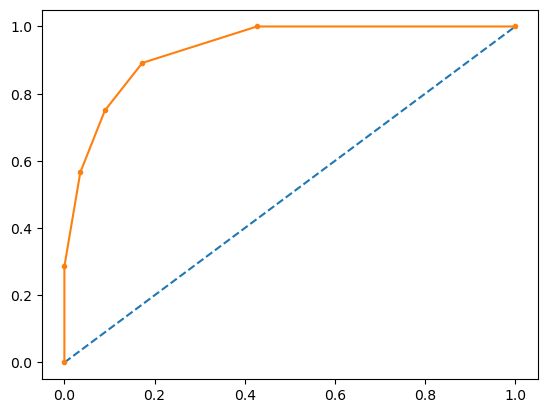

In [185]:
#import KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier

#training the model
nnh=KNeighborsClassifier().fit(X_train, y_train)
nnh_y_pred=nnh.predict(X_train)

#Confusion Matrix
nnh_confusion=confusion_matrix(y_train, nnh_y_pred)

#Colassification Report
nnh_classifiction_report=classification_report(y_train, nnh_y_pred)

#Accuracy Score
nnh_accuracy=accuracy_score(y_train,nnh_y_pred)

#ROC AUC Score
nnh_roc_auc_score=roc_auc_score(y_train,nnh_y_pred)

#Calculating probability of 1 for the testing data
nnh_y_pred_probs=nnh.predict_proba(X_train)
nnh_y_pred_probs=nnh_y_pred_probs[:,1]
fpr_train_nnh,tpr_train_nnh, thresholds_lda=roc_curve(y_train, nnh_y_pred_probs)

#Print various scores and metrics
print('Confusion Matrix:\n',nnh_confusion)
print('Classification Report:\n',nnh_classifiction_report)
print('Accuracy Score:',nnh_accuracy)
print('ROC AUC Score:',nnh_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_train_nnh,tpr_train_nnh,marker='.')
plt.show()

Confusion Matrix:
 [[275  53]
 [ 39  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       328
           1       0.63      0.70      0.66       130

    accuracy                           0.80       458
   macro avg       0.75      0.77      0.76       458
weighted avg       0.81      0.80      0.80       458

Accuracy Score: 0.7991266375545851
ROC AUC Score: 0.7692073170731707


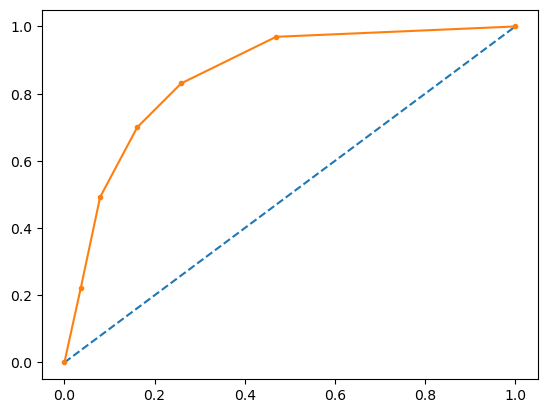

In [193]:
#testing the model
nnh=KNeighborsClassifier().fit(X_train, y_train)
nnh_y_pred=nnh.predict(X_test)

#Confusion Matrix
nnh_confusion=confusion_matrix(y_test, nnh_y_pred)

#Colassification Report
nnh_classifiction_report=classification_report(y_test, nnh_y_pred)

#Accuracy Score
nnh_accuracy=accuracy_score(y_test,nnh_y_pred)

#ROC AUC Score
nnh_roc_auc_score=roc_auc_score(y_test,nnh_y_pred)

#Calculating probability of 1 for the testing data
nnh_y_test_pred_probs=nnh.predict_proba(X_test)
nnh_y_test_pred_probs=nnh_y_test_pred_probs[:,1]
fpr_test_nnh,tpr_test_nnh, thresholds_lda=roc_curve(y_test, nnh_y_test_pred_probs)

#Print various scores and metrics
print('Confusion Matrix:\n',nnh_confusion)
print('Classification Report:\n',nnh_classifiction_report)
print('Accuracy Score:',nnh_accuracy)
print('ROC AUC Score:',nnh_roc_auc_score)

#plotting ROC-AUC curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_test_nnh,tpr_test_nnh,marker='.')
plt.show()

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging) and boosting.

Optimum value of k= 0.8144104803493449


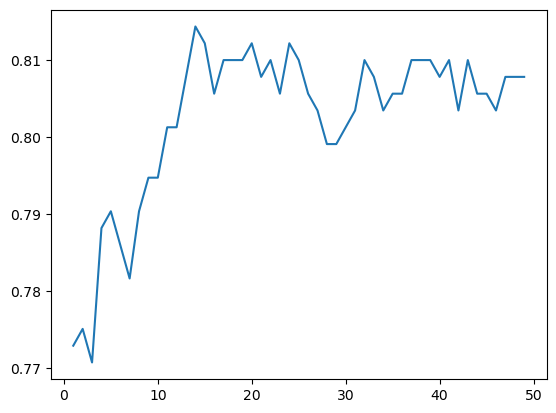

In [197]:
#Identifying the optimum value of K for KNN
scores=[]
for k in range(1,50):
    NNH=KNeighborsClassifier(n_neighbors=k, weights='distance')
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))  
plt.plot(range(1,50),scores)    

print('Highest score of KNN achieved=', max(scores))
#14

In [199]:
nnh2=KNeighborsClassifier(n_neighbors=14,weights='distance').fit(X_train,y_train)
nnh_y_pred=nnh2.predict(X_test)
#Confusion matrix
nnh_confusion=confusion_matrix(y_test, nnh_y_pred)

#Colassification Report
nnh_classifiction_report=classification_report(y_test, nnh_y_pred)

print('Confusion Matrix:\n',nnh_confusion)
print('Classification Report:\n',nnh_classifiction_report)

Confusion Matrix:
 [[284  44]
 [ 41  89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.68       130

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.81      0.82       458



Random Forest

In [200]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50, random_state=1)
rfcl=rfcl.fit(X_train, y_train)

In [202]:
y_predict=rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n',cm)
cr=classification_report(y_test, y_predict)
print('Classification Report:\n',cr)

0.8165938864628821
Confusion Matrix:
 [[286  42]
 [ 42  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.68      0.68      0.68       130

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Bagging

In [213]:
from sklearn.tree import DecisionTreeClassifier
dT=DecisionTreeClassifier(criterion='gini',random_state=1).fit(X_train, y_train)
#print(dT.score(X_train, y_train))
#print(dT.score(X_test, y_test))
y_dt_predict=dT.predict(X_test)
dtree_confusion=confusion_matrix(y_test,y_dt_predict)
dtree_classification=classification_report(y_test,y_dt_predict)
print('Confusion Matrix:\n',dtree_confusion)
print('Classsification Report:\n', dtree_classification)

0.9990627928772259
0.74235807860262
Confusion Matrix:
 [[265  63]
 [ 55  75]]
Classsification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       328
           1       0.54      0.58      0.56       130

    accuracy                           0.74       458
   macro avg       0.69      0.69      0.69       458
weighted avg       0.75      0.74      0.74       458



In [217]:
from sklearn.ensemble import BaggingClassifier
bgcl= BaggingClassifier(base_estimator=dT, n_estimators=50, random_state=1).fit(X_train, y_train)

y_bgdt_predict=bgcl.predict(X_test)

bgcl_confusion=confusion_matrix(y_test, y_bgdt_predict)
bgcl_classification=classification_report(y_test,y_bgdt_predict)

print('Confusion Matrix:\n',bgcl_confusion)
print('Classsification Report:\n', bgcl_classification)


Confusion Matrix:
 [[287  41]
 [ 47  83]]
Classsification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       328
           1       0.67      0.64      0.65       130

    accuracy                           0.81       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



In [218]:
dTreeR=DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1).fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test,y_test))


0.8472352389878163
0.8122270742358079


In [220]:
print(pd.DataFrame(dTreeR.feature_importances_, columns=['Imp'],index=X_train.columns))

                              Imp
age                      0.036732
economic.cond.national   0.022153
economic.cond.household  0.019490
Blair                    0.157607
Hague                    0.426457
Eurosceptic              0.216291
political.knowledge      0.121270
gender                   0.000000


boosting - Ada boosting

In [223]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(base_estimator=dT, n_estimators=10, random_state=1).fit(X_train, y_train)
y_ada_predict=abcl.predict(X_test)
y_ada_cm=confusion_matrix(y_test, y_ada_predict)
y_ada_cr=classification_report(y_test,y_ada_predict)
print('Confusion Matrix:\n',y_ada_cm)
print('Classification Report:\n',y_ada_cr)

Confusion Matrix:
 [[269  59]
 [ 45  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       328
           1       0.59      0.65      0.62       130

    accuracy                           0.77       458
   macro avg       0.72      0.74      0.73       458
weighted avg       0.78      0.77      0.78       458



# Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
1.	President Franklin D. Roosevelt in 1941
2.	President John F. Kennedy in 1961
3.	President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

2.2 Remove all the stopwords from all three speeches. – 3 Marks

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]


In [224]:
#import natural language tool kit and regular expression packages
import nltk
import re

In [225]:
#Read the speeches file
presidents_speeches=pd.read_excel('Project_Speech.xlsx')

In [226]:
presidents_speeches.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [227]:
presidents_speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Speech  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [228]:
presidents_speeches.shape

(3, 2)

In [266]:
#removing the salutations like 'Mr., 'Mrs.' before counting the full-stops.
presidents_speeches['stopwords'] = presidents_speeches['Speech'].apply(lambda x: ' '.join(x for x in x.split() if x.lower() not in ['Mr.','Mrs.','--','the','of','to','on','and','in','a','that']))
presidents_speeches[['Speech','stopwords']].head()

,Speech,stopwords
0,On each national day of inauguration since 178...,"each national day inauguration since 1789, peo..."
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...","Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...","Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [238]:
#count the number of sentences through the number of full-stops
presidents_speeches['full_stop_count']=presidents_speeches['stopwords'].apply(lambda x: len(str(x).split('.')))
presidents_speeches[['stopwords','full_stop_count']]

,stopwords,full_stop_count
0,On each national day of inauguration since 178...,69
1,"Vice President Johnson, Speaker, Chief Justice...",54
2,"Vice President, Speaker, Chief Justice, Senato...",66


In [231]:
presidents_speeches['char_count'] = presidents_speeches['Speech'].str.len() ## this also includes spaces
presidents_speeches[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7651
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


In [229]:
#Gives the total number of words present in the speech before removing any stopwords
presidents_speeches['totalwords'] = [len(x.split()) for x in presidents_speeches['Speech'].tolist()]
presidents_speeches[['Speech','totalwords']].head()

,Speech,totalwords
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [239]:
presidents_speeches['full_stop_count']=presidents_speeches['Speech'].apply(lambda x: len(str(x).split('.')))
presidents_speeches[['Speech','full_stop_count']]

,Speech,full_stop_count
0,On each national day of inauguration since 178...,69
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",70


In [268]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
#remove stopwords
presidents_speeches['stopwords'] = presidents_speeches['stopwords'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in stop))
presidents_speeches['stopwords'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\av913372\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    national day inauguration since 1789, people r...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: stopwords, dtype: object

In [241]:
#removal of special characters
presidents_speeches['stopwords'] = presidents_speeches['stopwords'].str.replace('[^\w\s]','')
presidents_speeches['stopwords'].head()

0    On national day inauguration since 1789, peopl...
1    Vice President Johnson, Speaker, Chief Justice...
2    Vice President, Speaker, Chief Justice, Senato...
Name: stopwords, dtype: object

In [251]:
#total count of words after removal of stopwords and special characters
presidents_speeches['totalwords'] = [len(x.split()) for x in presidents_speeches['stopwords'].tolist()]
presidents_speeches[['Speech','stopwords','word_count','totalwords', ]].head()

,Speech,stopwords,word_count,totalwords
0,On each national day of inauguration since 178...,"On national day inauguration since 1789, peopl...",1323,691
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...","Vice President Johnson, Speaker, Chief Justice...",1364,744
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...","Vice President, Speaker, Chief Justice, Senato...",1769,866


In [232]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

presidents_speeches['avg_word'] = presidents_speeches['Speech'].apply(lambda x: avg_word(x))
presidents_speeches[['Speech','avg_word']].head()

,Speech,avg_word
0,On each national day of inauguration since 178...,4.783825
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.626100
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.713397


In [249]:
presidents_speeches[['Name','char_count','word_count', 'full_stop_count','totalwords']]
#presidents_speeches.head()

,Name,char_count,word_count,full_stop_count,totalwords
0,Roosevelt,7651,1323,69,691
1,Kennedy,7673,1364,56,744
2,Nixon,10106,1769,70,866


In [287]:
#top 3 words that are used the most
freq = pd.Series(' '.join(presidents_speeches['stopwords']).split()).value_counts()[:3]
freq

us     44
new    25
let    18
Name: count, dtype: int64

In [279]:
#president_roosevelt=presidents_speeches.iloc[]
presidents_speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3 non-null      object 
 1   Speech           3 non-null      object 
 2   totalwords       3 non-null      int64  
 3   word_count       3 non-null      int64  
 4   char_count       3 non-null      int64  
 5   avg_word         3 non-null      float64
 6   full_stop_count  3 non-null      int64  
 7   stopwords        3 non-null      object 
dtypes: float64(1), int64(4), object(3)
memory usage: 320.0+ bytes


In [274]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\av913372\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [277]:
#!pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 1.4 MB/s eta 0:00:00


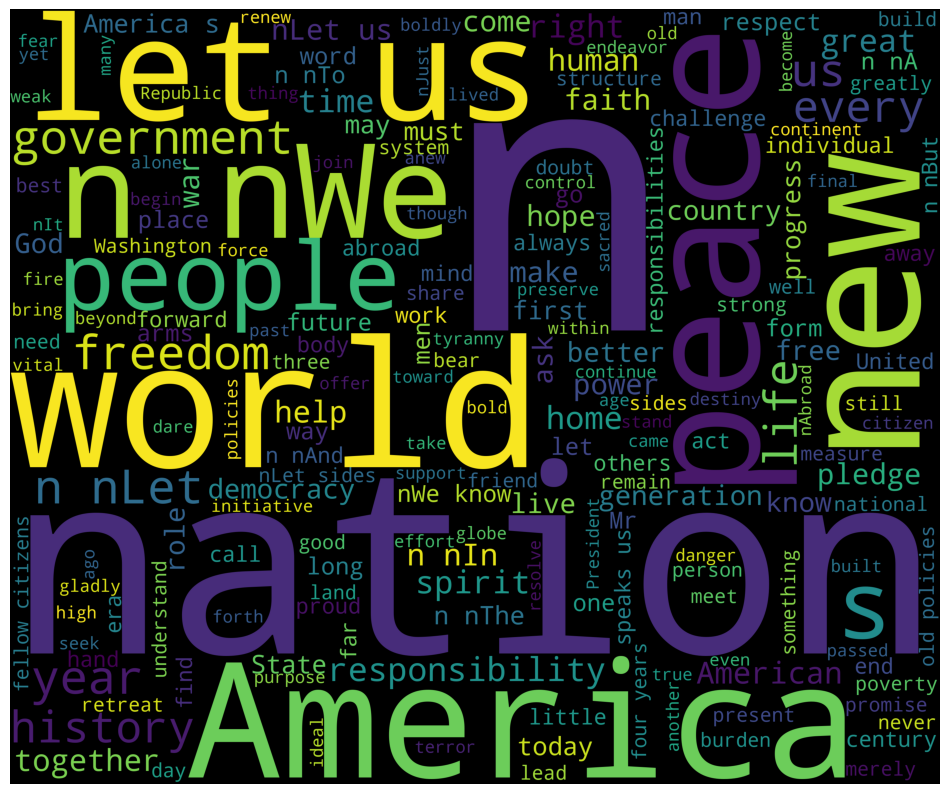

In [286]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(presidents_speeches['stopwords'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()